# Praktikum 1

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=96f874ebd3fd46384ca39acd1f1b21e36e9635b84b61b538088184f343349953
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 9.4824 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1605 ms


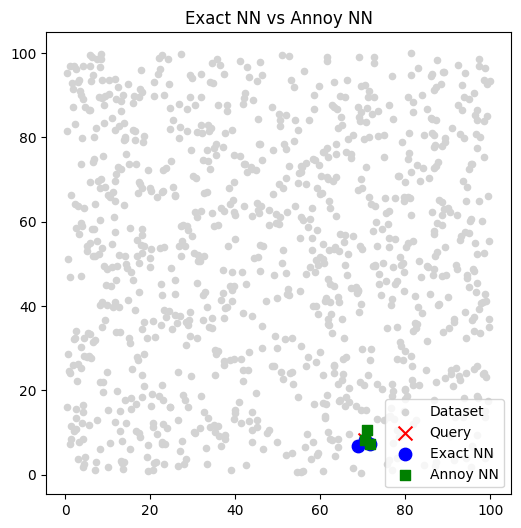

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5448 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.1988 ms


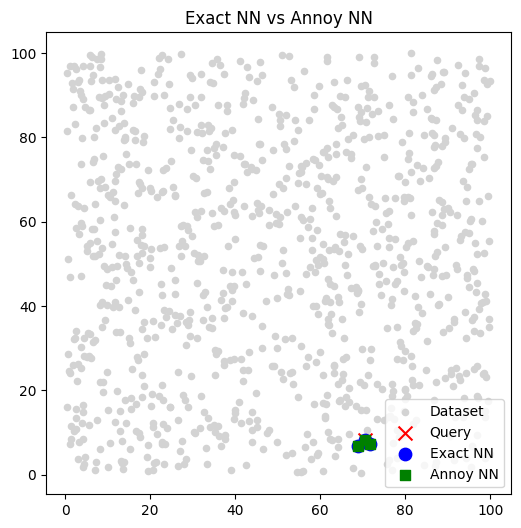

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 11.0493 ms

Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.2196 ms


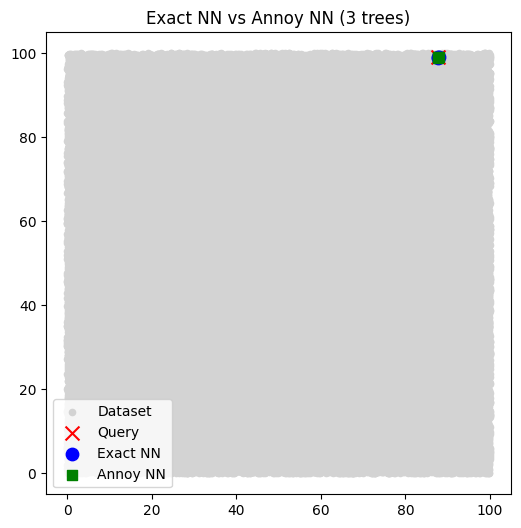

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Euclidean tree = 3, Jumlah data = 100.000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5188 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1719 ms


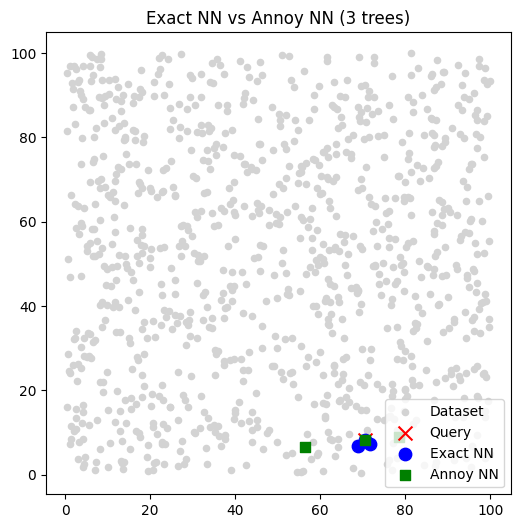

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 1.008 ms

Annoy NN index: [219, 429, 540]
Annoy NN jarak: [np.float64(0.0), np.float64(14.226342949460172), np.float64(8.050748999274271)]
Waktu Annoy: 0.1473 ms


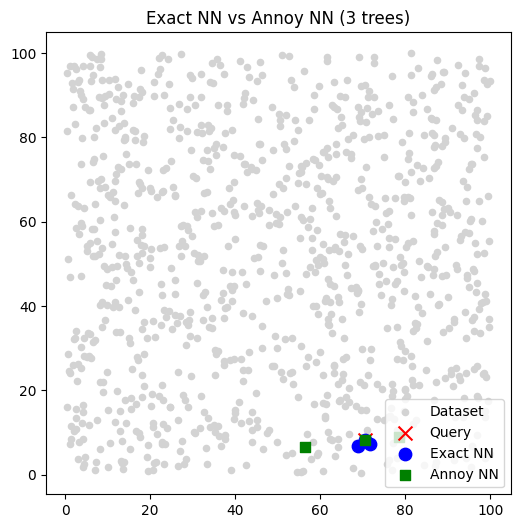

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 8, Jumlah data = 1000

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 8.4476 ms

Annoy NN index: [64040, 1310, 9720]
Annoy NN jarak: [np.float64(0.0), np.float64(13.237907813420613), np.float64(54.73661775436655)]
Waktu Annoy: 0.1743 ms


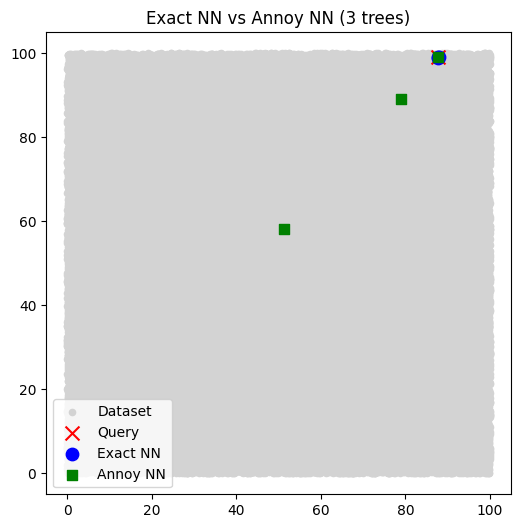

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

#Angular tree = 3, Jumlah data = 100000

# 1. Dataset 2D
np.random.seed(42)
n_points = 100000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

| No | Distance Metrics | Tree | Jumlah Data | Exact NN Index        | Exact NN Jarak                | Waktu Exact (ms) | Annoy NN Index        | Annoy NN Jarak                                | Waktu Annoy (ms) |
| -- | ---------------- | ---- | ----------- | --------------------- | ----------------------------- | ---------------- | --------------------- | --------------------------------------------- | ---------------- |
| 1  | Euclidean        | 3    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 9.9893           | [219, 898, 770]       | [0.0, 1.369159376273702, 2.568167959732514]   | 0.1469           |
| 2  | Euclidean        | 8    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 0.5448           | [219, 898, 593]       | [0.0, 1.369159376273702, 2.2793154441691197]  | 0.1988           |
| 3  | Euclidean        | 3    | 100,000     | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 11.0493          | [64040, 64186, 88792] | [0.0, 0.1579786703429142, 0.2533271079062769] | 0.2196           |
| 4  | Angular          | 3    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 0.5188           | [219, 429, 540]       | [0.0, 14.226342949460172, 8.050748999274271]  | 0.1719           |
| 5  | Angular          | 8    | 1,000       | [219, 898, 593]       | [0.0, 1.36915938, 2.27931544] | 1.008            | [219, 429, 540]       | [0.0, 14.226342949460172, 8.050748999274271]  | 0.1473           |
| 6  | Angular          | 3    | 100,000     | [64040, 64186, 88792] | [0.0, 0.15797867, 0.25332711] | 8.4476           | [64040, 1310, 9720]   | [0.0, 13.237907813420613, 54.73661775436655]  | 0.1743           |


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [39253267 17901692 34062607 19464615 38733274]
Exact NN time: 17.114 seconds


**Saya kurangi Pengambilan data nya karena sangat besar, jadi saya ambil 10 jt dengan dataset track yang diambil secara acak**

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# Jumlah data dan fitur
n_tracks = 10_000_000   # 10 juta track
n_features = 20        # contoh fitur: danceability, energy, tempo, dll.

# Dataset acak untuk simulasi vektor fitur lagu
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# Vektor query (misal lagu baru yang ingin dicari kemiripannya)
query = np.random.rand(1, n_features).astype(np.float32)

print(f"Dataset siap: {X.shape[0]:,} data dengan {X.shape[1]} fitur.")

# Gunakan jarak Euclidean untuk menghitung semua jarak langsung
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung jarak ke semua data
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = (time.time() - start) * 1000      # konversi ke milidetik

print("\n=== Exact NN ===")
print("Index terdekat :", exact_idx)
print("Jarak terdekat :", distances[exact_idx])
print(f"Waktu komputasi: {exact_time:.3f} ms")

# Inisialisasi Annoy index dengan metric Euclidean
f = n_features
n_trees = 3   # jumlah tree, makin banyak makin akurat tapi lebih lama build

annoy_index = AnnoyIndex(f, 'euclidean')

# Tambahkan item ke index (gunakan loop besar tapi efisien)
print("\nMembangun index Annoy...")
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])

# Bangun struktur pohon (index)
build_start = time.time()
annoy_index.build(n_trees)
build_time = (time.time() - build_start) * 1000

# Query ke index (ambil 5 lagu terdekat)
start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
annoy_time = (time.time() - start) * 1000

print("\n=== Annoy (Approx NN) ===")
print("Index terdekat :", annoy_idx)
print("Waktu build index:", f"{build_time:.3f} ms")
print("Waktu query:", f"{annoy_time:.3f} ms")

print("\n=== Perbandingan Waktu ===")
print(f"- Exact NN (Brute Force): {exact_time:.3f} ms")
print(f"- Annoy (Approx NN): {annoy_time:.3f} ms (build index: {build_time:.3f} ms)")


Dataset siap: 10,000,000 data dengan 20 fitur.

=== Exact NN ===
Index terdekat : [2906855 7850705 9466600 4726143 4095053]
Jarak terdekat : [0.63580906 0.64468515 0.647164   0.64952475 0.6617256 ]
Waktu komputasi: 2292.292 ms

Membangun index Annoy...

=== Annoy (Approx NN) ===
Index terdekat : [8666528, 3056044, 799736, 1468809, 3135547]
Waktu build index: 75597.727 ms
Waktu query: 0.194 ms

=== Perbandingan Waktu ===
- Exact NN (Brute Force): 2292.292 ms
- Annoy (Approx NN): 0.194 ms (build index: 75597.727 ms)


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [518269 744673 125956 586590 976518]
Exact NN time: 0.204 seconds
Annoy result: [518269, 586590, 415714, 726113, 978246]
Annoy time: 0.0 seconds


In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 1_000_000   # 1 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'angular')
n_trees = 8

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [645459  52963 477176 475619 106511]
Exact NN time: 0.168 seconds
Annoy result: [642312, 748151, 72718, 616497, 574397]
Annoy time: 0.0 seconds


| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN                 | Hasil Index terdekat ANN                 | Waktu komputasi Vs |
| ---------------- | ---- | ----------- | ---------------------------------------- | ---------------------------------------- | ------------------ |
| Euclidean        | 8    | 1,000,000   | [518269, 744673, 125956, 586590, 976518] | [518269, 586590, 415714, 726113, 978246] | 0.204 s vs 0.0 s   |
| Angular          | 8    | 1,000,000   | [645459, 52963, 477176, 475619, 106511]  | [642312, 748151, 72718, 616497, 574397]  | 0.168 s vs 0.0 s   |


**Pertanyaannya: Kenapa code dibagian build index tidak dihitung waktunya?**

jawab: Karena waktu build index Annoy itu merupakan tahapan preprocess, bukan bagian dari proses querying.